# Notebook used to combine and clean the raw data

In [2]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Load and combine Data

In [ ]:
folder_path = '../data/raw_data'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
combined_df.to_csv('../data/raw_data/atp_matches_68_24.csv', index=False)

In [4]:
data_path = '../data/raw_data/atp_matches_68_24.csv'
data = pd.read_csv(data_path)

### Filter columns

In [5]:
data['year'] = data['tourney_date'] //  10000
data['month'] = (data['tourney_date'] %  10000) //  100

columns = [
    "tourney_name",
    "surface",
    "draw_size",
    "tourney_level",
    "year",
    "month",
    "winner_seed",
    #"winner_entry",
    "winner_hand",
    "winner_ht",
    "winner_ioc",
    "winner_age",
    "winner_rank",
    "winner_rank_points",
    "loser_seed",
    #"loser_entry",
    "loser_hand",
    "loser_ht",
    "loser_ioc",
    "loser_age",
    "loser_rank",
    "loser_rank_points",
    "best_of",
    "round",
    "score"
]

data = data[columns]

### Remoning Nans

In [6]:
NO_SEED_VALUE = 36.

#Remove Nan from seeds
data.loc[pd.isna(data['winner_seed']), 'winner_seed'] = NO_SEED_VALUE
data.loc[pd.isna(data['loser_seed']), 'loser_seed'] = NO_SEED_VALUE

#Remove tiny Tennis Player
data = data[data['winner_ht'] > 100]
data = data[data['loser_ht'] > 100]

In [7]:
# Removing remaining Nans
df = data.dropna()
print(df.shape)

(317049, 23)


### Histograms

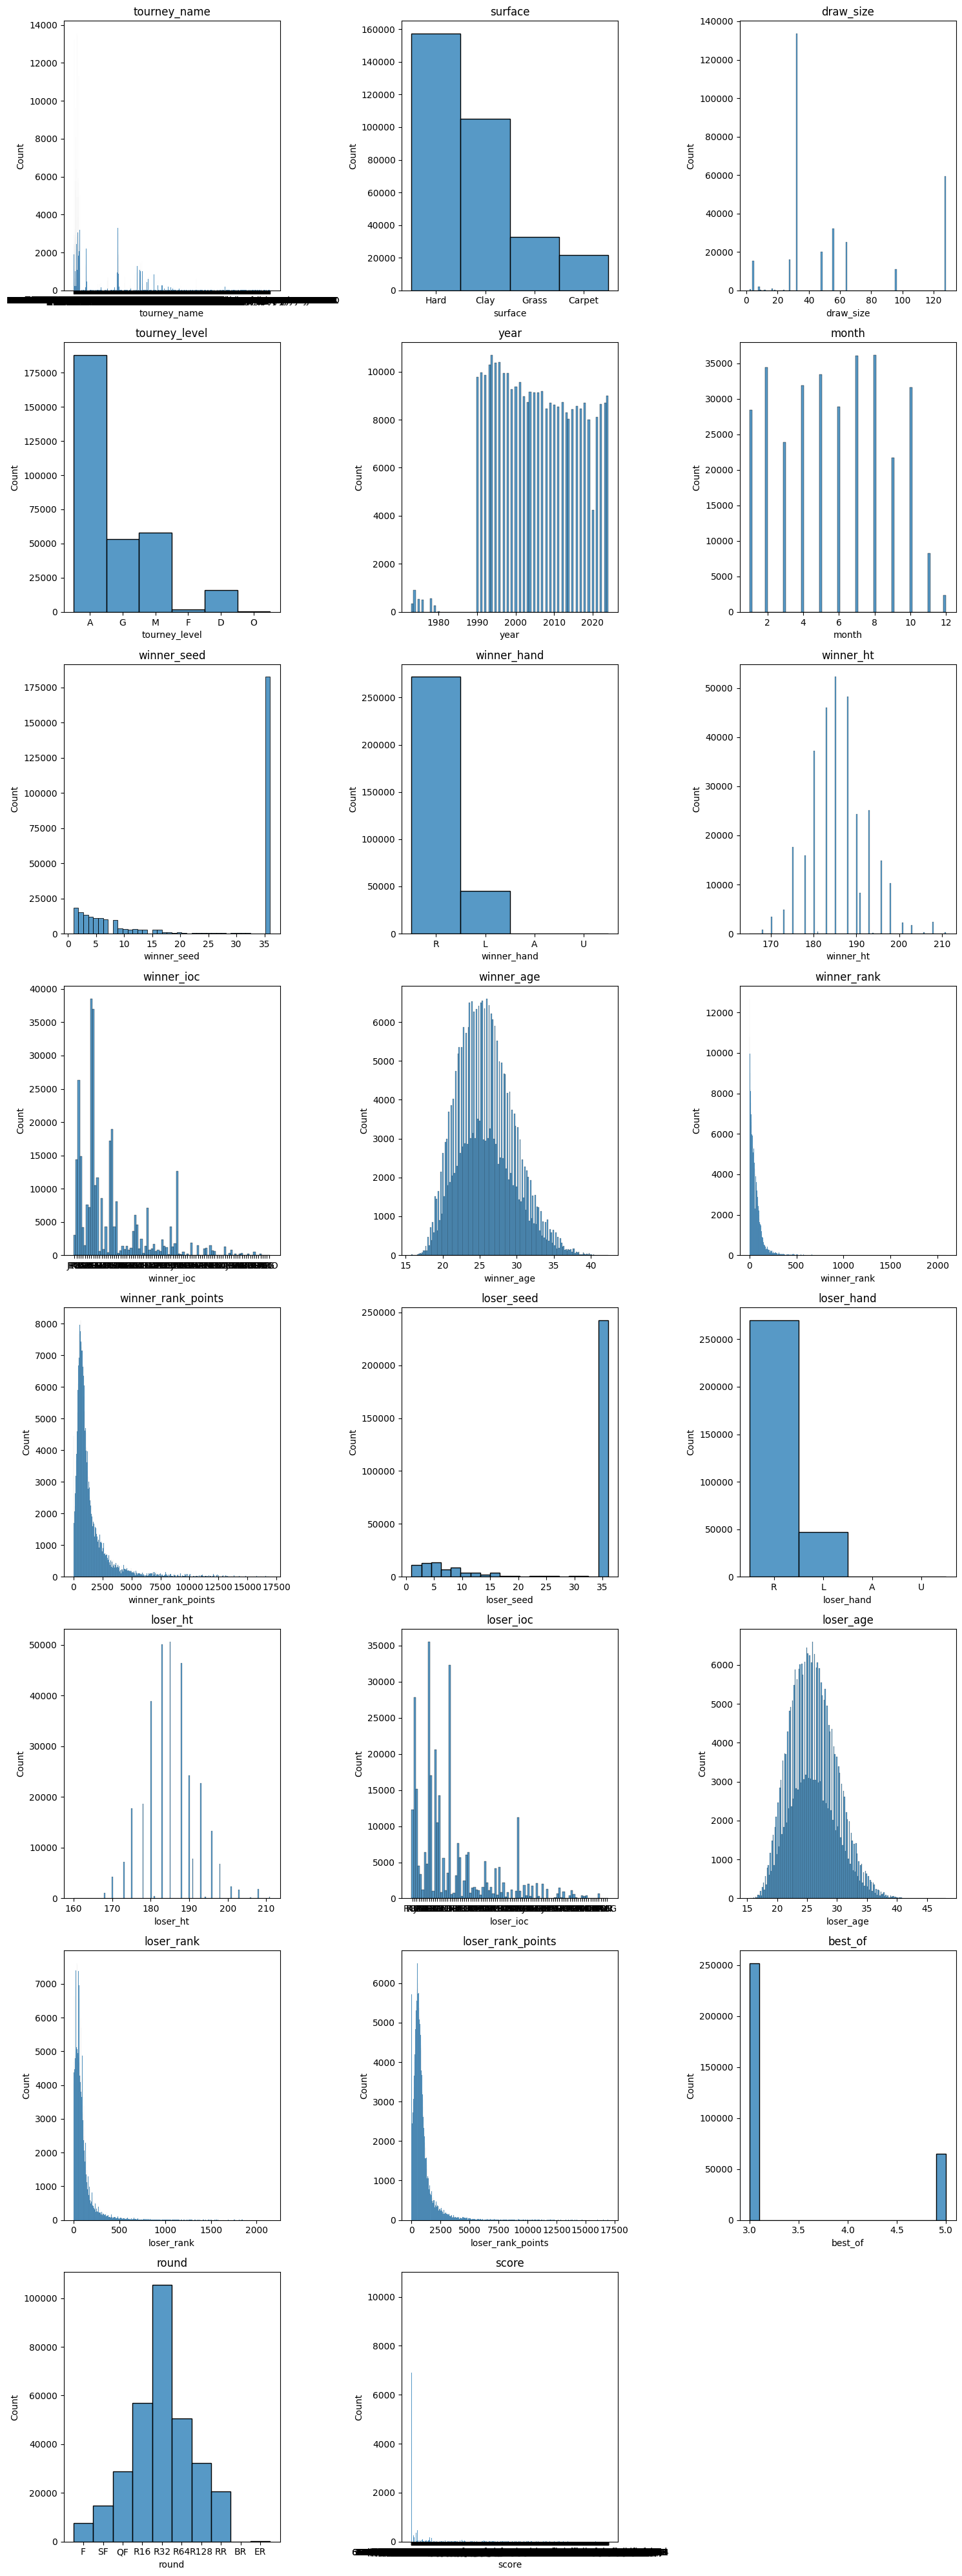

In [8]:
# Assume df is your DataFrame
numeric_cols = df.columns
n_cols = len(numeric_cols)

# Set grid size
n_rows = math.ceil(n_cols / 3)
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=False)
    axes[i].set_title(f'{col}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Save Data

In [9]:
df.to_csv('../data/preprocessed_data/atp_matches_68_24_cleaned.csv', index=False)